In [15]:
## 1. Load libraries and set env 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from dateutil.parser import parse

%matplotlib inline 
plt.style.use('seaborn-white')



In [10]:
## 2. Load Dataset
DATA_DIR = "../DS_Certification/datasets"
DATA_FILE = "all_KE_CHVs_data_1493.csv" 

dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE) )


# Introduction 
This is a quick peak into the data we collect on assessments and sales for all 1493 CHPs to date. 

## Questions 
1. What improves sales?
2. How well are we doing with the core diseases?
3. What drives referrals?
4. What relationships between the different disease/assessment types?
5. How relates to Equity Lens findings?


## Approach
- Correlations 
- Logit regression 

## Themes
- Pregnancy --> registration, PNC visits 
- Diseases --> Malaria, Diarrhoea, Pneumonia, 
- Assessments --> Assessment, Treatment, Referral f/u, Visits
- Operations --> Sales, Community Events, HH registrations 



In [23]:
## The groupings/themes
pregoz = ["Pregnancy", "PNC Visit Rate", "PNC Visit Missed - #"] 
U1s = ["Total U1 Assessments", "Total U1 Treatments"]
U5s = ["Total U5 Assessments", "Total U5 Treatments", "On Time Referral f/u Treatment U5", "Missed Visits" ] 
malaria = ["All Malaria Assessments", "All Malaria Treatments", "U5 Malaria", "%mRDT", "Act 6pack Issue", "mRDT Used"]
U5diseases = [ "U5 Malaria", "U5 Diarrhea", "U5 Pneumonia"] 
Ops = [ "Households Registered","Sales", "Community Events"] 

# What the data looks like
- Sample structure
- Limitations 
- Summary stats & distributions 




## Sample Structure
- Data not mapped to branches and districts
- Sample details on # CHPs and households 

In [14]:
print("CHP and Household Numbers ")
dataset['Households Registered'].describe()

CHP and Household Numbers 


count    1493.000000
mean       99.099799
std        48.424606
min         0.000000
25%        75.000000
50%       100.000000
75%       125.000000
max       356.000000
Name: Households Registered, dtype: float64

In [51]:
print("n by diseases") 
dataset[U5diseases].describe()

n by diseases


,U5 Malaria,U5 Diarrhea,U5 Pneumonia
count,1493.000000,1493.000000,1493.000000
mean,1.004689,0.334226,0.356330
std,2.155635,0.807231,0.943594
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,18.000000,10.000000,10.000000


## Limitations 
- 

## Distributions 
**Summary Findings**
- We're more consistent in health related activities and particularly, household registration and assessments than sales related activities
    - Household registrations and U5 assessments demonstrate more of a normal curve. 
    - Sales and community events are skewed to low 
- Conversion rates of assessments to treatments and follow-up activities get worse as wo traverse the series
    - Assumes an overarching sequential path from assessment to treatment then referral and health facility visits
    - Assessments have more normal curves while visits have skewed to low visits 


The Distribution plots of interest as corr matrices too???


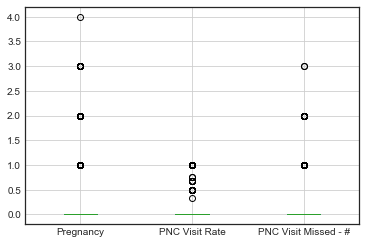

In [35]:
print("The Distribution plots of interest as corr matrices too???")
# fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=0.4) 
# fig.add_subplot(2,3, 1).figure(  )
dataset[pregoz[:]].boxplot() 

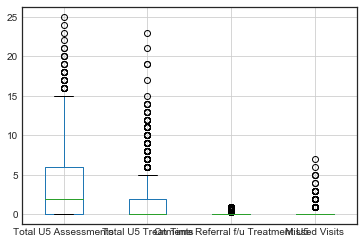

In [43]:
dataset[U5s].boxplot() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210396B55F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021037353B00>]], dtype=object)

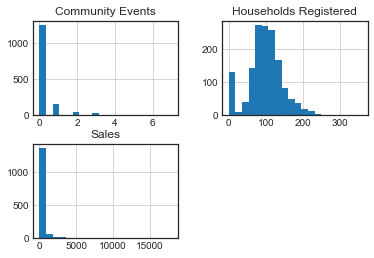

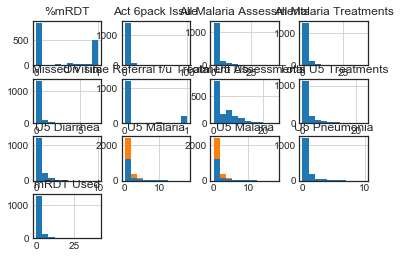

In [79]:
dataset[Ops].hist(stacked=True, bins=20)  
dataset[U5s + U5diseases + malaria].hist(stacked=True, bins=10)   

In [60]:
## Trim outliers based on U5 assessments Vs HH registered??? 

## Correlations
- Within a theme 
    - E.g. within pregnancy or malaria variables 
- Between themes
    - pregnancy assessments and U5 assessments

### Within A Theme
1. Operations 
2. Assessments
3. Pregnancy
4. Diseases 

**Highlights** 
- We know how to do malaria well
    - Malaria has the correlation values; shows strong correlation within its measures compared to others
    - Malaria workflow is followed
        - Each malaria treatement gets an mRDT and ACT 6pack consistenty
    - Recorded malaria cases are driven by care to children. 
    - referral cases correlate more with pneumonia and diarrhea 

- Sales continues to be a challenge
    - Community events are not driving sales but may have potential to do so 
    - Sales do not correlate with registered households. 
        - TBD: are sales records tied to HH profiles? 
        - 

- Pregnancy registration and support seem to be tied to whether a household already has children OR vice versa. 
    - Pregnancy registrations correlate more with total U5 assessments 
    - 
    - PS: Equity lens data suggested that CHPs prioritize poorer and less educated househodls for some reason
    - The magnitudes are below 0.32, which is usually the threshold for existence of a relationship. 
        - TBD: but could also be b/c of nature of our data
        
- Total children assessments are driven by U1s and relate to Malaria cases
    - Malaria treatement services seems to do we and referral cases relate more to the other diseases (pneumonia and diarrhoea) 

- Community events seem to be more tied to child care delivery or assessments than to generating sales or new household registration 
    - Community events have a strong correlation with U5 assessments (and of course U1s) compared to sales and household registration at 0.31 Vs 0.14 and 0.1 respectively << How do we record the events and what's the flow of activities with household registration 
    



**Questions** 
Malaria 
- Should we extend malaria to all not just children?
- Impact & pricing - there's clear demand and proper usage. So, should we offer malaria treatment fully free or not? 
    -Also, what would we find if we recorded all malaria cases CHVs attend to and not just for U5s?
- Could it be that care for other diseases is not as strongly related b/c there's no comprehensive support/end-point by the CHP OR b/c referral is not as strong, which is the main end-point for the other diseases? 
    
Sales
- Empower community events and drive sales outside of HH visits/registration activities
    - anybody from anywhere can buy? 
    
Pregnancy
- Expand registration to outside of households that already have children.
    - How do we capture new mothers/families/households? << Anything to do with traditions? 



In [66]:
print("Correlations within Operations")
dataset[Ops].corr()

Correlations within Operations


,Households Registered,Sales,Community Events
Households Registered,1.000000,0.130296,0.100606
Sales,0.130296,1.000000,0.144770
Community Events,0.100606,0.144770,1.000000


In [70]:
print("Correlations within Assessments")
dataset[U5s].corr()

Correlations within Assessments


,Total U5 Assessments,Total U5 Treatments,On Time Referral f/u Treatment U5,Missed Visits
Total U5 Assessments,1.000000,0.697116,0.397401,0.234808
Total U5 Treatments,0.697116,1.000000,0.327376,0.231976
On Time Referral f/u Treatment U5,0.397401,0.327376,1.000000,0.041971
Missed Visits,0.234808,0.231976,0.041971,1.000000


In [71]:
print("Correlations within Pregnancy")
dataset[pregoz].corr()

Correlations within Pregnancy


,Pregnancy,PNC Visit Rate,PNC Visit Missed - #
Pregnancy,1.000000,0.156295,-0.008453
PNC Visit Rate,0.156295,1.000000,-0.081498
PNC Visit Missed - #,-0.008453,-0.081498,1.000000


In [73]:
print("Correlations within Diseases")
dataset[U5diseases].corr()

Correlations within Diseases


,U5 Malaria,U5 Diarrhea,U5 Pneumonia
U5 Malaria,1.000000,0.183598,0.170854
U5 Diarrhea,0.183598,1.000000,0.284386
U5 Pneumonia,0.170854,0.284386,1.000000


In [74]:
print("Correlations within Malaria")
dataset[malaria].corr()

Correlations within Malaria


,All Malaria Assessments,All Malaria Treatments,U5 Malaria,%mRDT,Act 6pack Issue,mRDT Used
All Malaria Assessments,1.000000,0.942509,0.871211,0.600374,0.897925,1.000000
All Malaria Treatments,0.942509,1.000000,0.886340,0.508043,0.956938,0.942509
U5 Malaria,0.871211,0.886340,1.000000,0.545584,0.753405,0.871211
%mRDT,0.600374,0.508043,0.545584,1.000000,0.449386,0.600374
Act 6pack Issue,0.897925,0.956938,0.753405,0.449386,1.000000,0.897925
mRDT Used,1.000000,0.942509,0.871211,0.600374,0.897925,1.000000


In [76]:
print("Correlate pregnancies with Ops and U5 activity and disease type")
dataset[pregoz+Ops+U5s+U5diseases].corr()

Correlate pregnancies with Ops and U5 activity and disease type


,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Households Registered,Sales,Community Events,Total U5 Assessments,Total U5 Treatments,On Time Referral f/u Treatment U5,Missed Visits,U5 Malaria,U5 Diarrhea,U5 Pneumonia
Pregnancy,1.000000,0.156295,-0.008453,0.189098,0.120124,0.104256,0.265491,0.232528,0.227603,0.121286,0.163824,0.175525,0.170671
PNC Visit Rate,0.156295,1.000000,-0.081498,0.144002,0.059342,0.143788,0.280487,0.201267,0.165571,0.056679,0.132705,0.173392,0.150138
PNC Visit Missed - #,-0.008453,-0.081498,1.000000,0.192448,0.045127,-0.064763,-0.044226,-0.048410,-0.047904,-0.002683,-0.029759,-0.024092,-0.056116
Households Registered,0.189098,0.144002,0.192448,1.000000,0.130296,0.100606,0.222689,0.223257,0.162505,0.113884,0.196350,0.147923,0.092262
Sales,0.120124,0.059342,0.045127,0.130296,1.000000,0.144770,0.104838,0.090542,0.064931,0.024783,0.039952,0.128576,0.069388
Community Events,0.104256,0.143788,-0.064763,0.100606,0.144770,1.000000,0.314179,0.182590,0.185773,0.049825,0.143344,0.088330,0.142774
Total U5 Assessments,0.265491,0.280487,-0.044226,0.222689,0.104838,0.314179,1.000000,0.697116,0.397401,0.234808,0.602455,0.386643,0.376780
Total U5 Treatments,0.232528,0.201267,-0.048410,0.223257,0.090542,0.182590,0.697116,1.000000,0.327376,0.231976,0.873936,0.521636,0.546493
On Time Referral f/u Treatment U5,0.227603,0.165571,-0.047904,0.162505,0.064931,0.185773,0.397401,0.327376,1.000000,0.041971,0.207582,0.236409,0.302144
Missed Visits,0.121286,0.056679,-0.002683,0.113884,0.024783,0.049825,0.234808,0.231976,0.041971,1.000000,0.100934,0.260951,0.239611


In [77]:
print("Correlate U5 assessments with Ops and diseases+U1s") 
dataset[U5s+Ops+U5diseases+U1s].corr()

Correlate U5 assessments with Ops and diseases+U1s


,Total U5 Assessments,Total U5 Treatments,On Time Referral f/u Treatment U5,Missed Visits,Households Registered,Sales,Community Events,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Total U1 Assessments,Total U1 Treatments
Total U5 Assessments,1.000000,0.697116,0.397401,0.234808,0.222689,0.104838,0.314179,0.602455,0.386643,0.376780,0.770173,0.476186
Total U5 Treatments,0.697116,1.000000,0.327376,0.231976,0.223257,0.090542,0.182590,0.873936,0.521636,0.546493,0.524414,0.693959
On Time Referral f/u Treatment U5,0.397401,0.327376,1.000000,0.041971,0.162505,0.064931,0.185773,0.207582,0.236409,0.302144,0.441827,0.293913
Missed Visits,0.234808,0.231976,0.041971,1.000000,0.113884,0.024783,0.049825,0.100934,0.260951,0.239611,0.248848,0.238278
Households Registered,0.222689,0.223257,0.162505,0.113884,1.000000,0.130296,0.100606,0.196350,0.147923,0.092262,0.207680,0.183731
Sales,0.104838,0.090542,0.064931,0.024783,0.130296,1.000000,0.144770,0.039952,0.128576,0.069388,0.105880,0.098615
Community Events,0.314179,0.182590,0.185773,0.049825,0.100606,0.144770,1.000000,0.143344,0.088330,0.142774,0.261153,0.132893
U5 Malaria,0.602455,0.873936,0.207582,0.100934,0.196350,0.039952,0.143344,1.000000,0.183598,0.170854,0.426801,0.575005
U5 Diarrhea,0.386643,0.521636,0.236409,0.260951,0.147923,0.128576,0.088330,0.183598,1.000000,0.284386,0.306876,0.411252
U5 Pneumonia,0.376780,0.546493,0.302144,0.239611,0.092262,0.069388,0.142774,0.170854,0.284386,1.000000,0.330051,0.408998
